**A simple data science study on [German Credit Data (StatLog)](http://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data))** 

<ul>
    <li>Don't panic if you are not familiar with the libraries. Slowly, I will introduce you to these.
    <li>Play with every cell in this notebook and see what is happening. Don't play too much, until you can't fix it :-)
    <li>Contact me, if you have any question. We can discuss in the lecture.
</ul>

In [1]:
#load essential header libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

**Data Science Project Stage: Data Collection and Management**

In [2]:
#load the credit data
data = pd.read_csv('german.data', delimiter=' ', header=None)

In [3]:
#print the header
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


*In the above, first 20 columns are features, last column is the class {1,2}; 1: good customer, 2: bad customer.*

In [4]:
#encode the categorical features as numeric features
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
print(categorical_cols)
LabelEnc = LabelEncoder()

for i in range(len(categorical_cols)):
    data[categorical_cols[i]] = LabelEnc.fit_transform(data[categorical_cols[i]])

data.head()

Int64Index([0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19], dtype='int64')


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [5]:
class_col = data.columns[-1] #-1: refers to the last column data.columns[20]

#print some relevant information about this data
print('# of input attributes\t\t\t:\t', data.shape[1]-1)

#print number of instances
print('# of customer records in the dataset\t:\t', data.shape[0])

#number of classes of customers
print('# of classes in the dataset\t\t:\t', data[data.columns[-1]].nunique())

#number of customers in each class
print('# of class 1(good) customers\t\t:\t', len(data[data[class_col]==1]))
print('# of class 2(bad) customers\t\t:\t', len(data[data[class_col]==2]))

# of input attributes			:	 20
# of customer records in the dataset	:	 1000
# of classes in the dataset		:	 2
# of class 1(good) customers		:	 700
# of class 2(bad) customers		:	 300


In [6]:
#extract input and class(target) from the dataset
X = data.drop(class_col, axis=1) #axis=1 means the column axis
y = data[class_col]
y = LabelEnc.fit_transform(y) #convert 1, 2 to 0 and 1

#check the shape of X and y
print('shape of X:', X.shape)
print('shape of y:', y.shape)

shape of X: (1000, 20)
shape of y: (1000,)


**Let's say goal is to build a classification model. However, there is a problem. If we build a model with the entire dataset of 1000 records, there is no way of knowing how the model will perform when deployed. For this performance check, we will separate out a subset of (say) 30% of these data, and we will treat this data as a proxy for the real-world data (called test set). This is used to check the generalisation performance of a machine learning model.**

In [20]:
#create the training and test set (Note that, I am not creating any development/validation set here to keep things simple)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42, 
                                                    stratify=y)

In [21]:
#now print the shape of the train and test set
print('shape of X_train\t:\t', X_train.shape)
print('shape of y_train\t:\t', y_train.shape)
print('\tclass1 count\t:\t', len(y_train[y_train==0]))
print('\tclass2 count\t:\t', len(y_train[y_train==1]))
print()

print('shape of X_test\t\t:\t', X_test.shape)
print('shape of y_test\t\t:\t', y_test.shape)
print('\tclass1 count\t:\t', len(y_test[y_test==0]))
print('\tclass2 count\t:\t', len(y_test[y_test==1]))

shape of X_train	:	 (700, 20)
shape of y_train	:	 (700,)
	class1 count	:	 490
	class2 count	:	 210

shape of X_test		:	 (300, 20)
shape of y_test		:	 (300,)
	class1 count	:	 210
	class2 count	:	 90


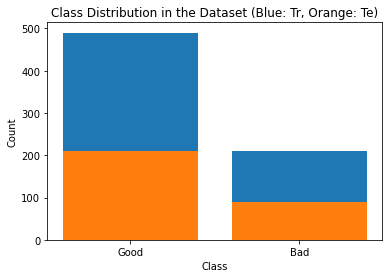

In [19]:
#let's plot the histogram of class distribution for these two sets
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)
plt.title('Class Distribution in the Dataset (Blue: Tr, Orange: Te)')
plt.xlabel('Class')
plt.ylabel('Count')
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 2, step=1), ['Good', 'Bad'])
plt.show()

<hr/>

**Data Science Project Stage: Modeling**

In [56]:
#initialise model for a decision tree
dtree = DecisionTreeClassifier(random_state=0, max_depth=10)

#from sklearn.svm import LinearSVC
#svm = LinearSVC(random_state=50, max_iter=10000)

In [57]:
#train the decision tree model
import time

tic = time.time()
dtree.fit(X_train, y_train)
#svm.fit(X_train, y_train)
toc = time.time()

print('Time taken to train the model\t:\t', (tic-toc),'second.')

Time taken to train the model	:	 -0.01501011848449707 second.


[Text(184.26189320388352, 203.85, 'X[0] <= 1.5\ngini = 0.42\nsamples = 700\nvalue = [490, 210]'),
 Text(120.6742718446602, 176.67000000000002, 'X[5] <= 1.5\ngini = 0.492\nsamples = 380\nvalue = [214, 166]'),
 Text(65.82233009708739, 149.49, 'X[1] <= 22.5\ngini = 0.5\nsamples = 305\nvalue = [157, 148]'),
 Text(26.003883495145633, 122.31, 'X[2] <= 1.5\ngini = 0.471\nsamples = 174\nvalue = [108, 66]'),
 Text(6.500970873786408, 95.13, 'X[3] <= 0.5\ngini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Text(3.250485436893204, 67.94999999999999, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(9.751456310679613, 67.94999999999999, 'X[1] <= 9.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(6.500970873786408, 40.77000000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(13.001941747572817, 40.77000000000001, 'X[14] <= 0.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(9.751456310679613, 13.590000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(16.252427184466022, 13.59

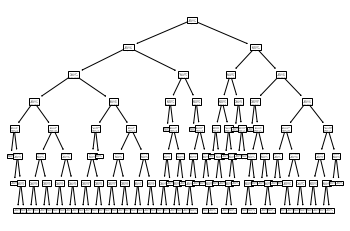

In [52]:
#plot the tree (model visualisation)
plot_tree(dtree)

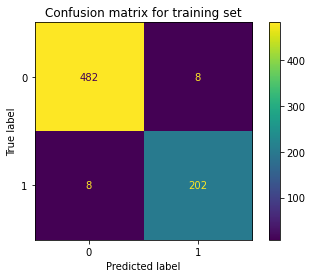


Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       490
           1       0.96      0.96      0.96       210

    accuracy                           0.98       700
   macro avg       0.97      0.97      0.97       700
weighted avg       0.98      0.98      0.98       700



In [58]:
#see the training performance
disp = plot_confusion_matrix(dtree, X_train, y_train)
disp.ax_.set_title('Confusion matrix for training set')
plt.show()
print('\nClassification report:\n',classification_report(y_train, dtree.predict(X_train)))

In [59]:
#test the trained model on test set
y_pred = dtree.predict(X_test)

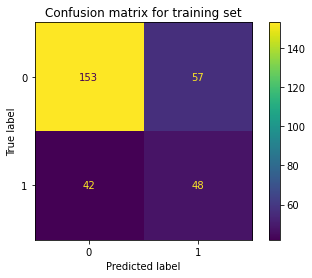


Classification report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76       210
           1       0.46      0.53      0.49        90

    accuracy                           0.67       300
   macro avg       0.62      0.63      0.62       300
weighted avg       0.69      0.67      0.68       300



In [60]:
#see the testing performance
disp = plot_confusion_matrix(dtree, X_test, y_test)
disp.ax_.set_title('Confusion matrix for training set')
plt.show()
print('\nClassification report:\n',classification_report(y_test, y_pred))

<hr/>

**Homework:**

<ol>
    <li> Experiment with various depth of decision tree (notedown the training and testing performance)
    <li> Remove some columns of the data and experiment. Notedown the performance.
    <li> What can you say about these results and these variations in results?
</ol>